In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
books = pd.read_csv('books.csv',error_bad_lines=False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [26]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [27]:
books.index = books["bookID"]

In [28]:
#Setting a standard name for authors with multiple names
books.loc[(books.authors == 'J.K. Rowling-Mary GrandPré'),'authors'] = 'J.K. Rowling'

In [29]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
bookID,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.56,0439785960,9780439785969,eng,652,1944099,26249
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,0439358078,9780439358071,eng,870,1996446,27613
3,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.47,0439554934,9780439554930,eng,320,5629932,70390
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.55,043965548X,9780439655484,eng,435,2149872,33964


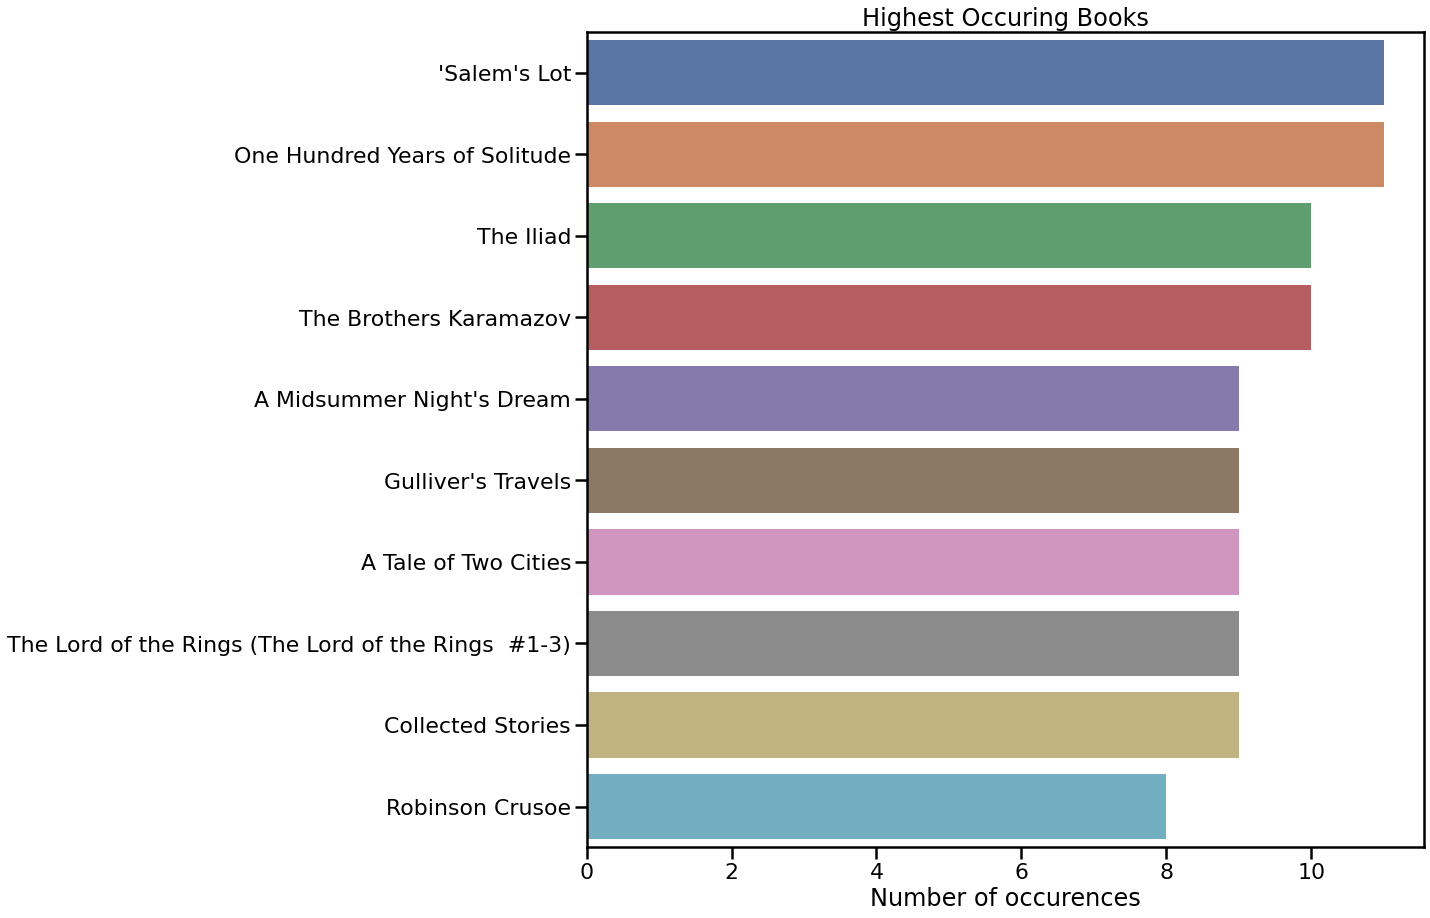

In [30]:
# plotting books which appear the most in the dataset
sns.set_context('poster')
plt.figure(figsize=(15,15))
book_counts = books['title'].value_counts()[:10] #first 10 books
ratings = books['average_rating'][:10]
sns.barplot(x=book_counts,y=book_counts.index,palette="deep")

plt.title('Highest Occuring Books')
plt.xlabel('Number of occurences')
plt.show()

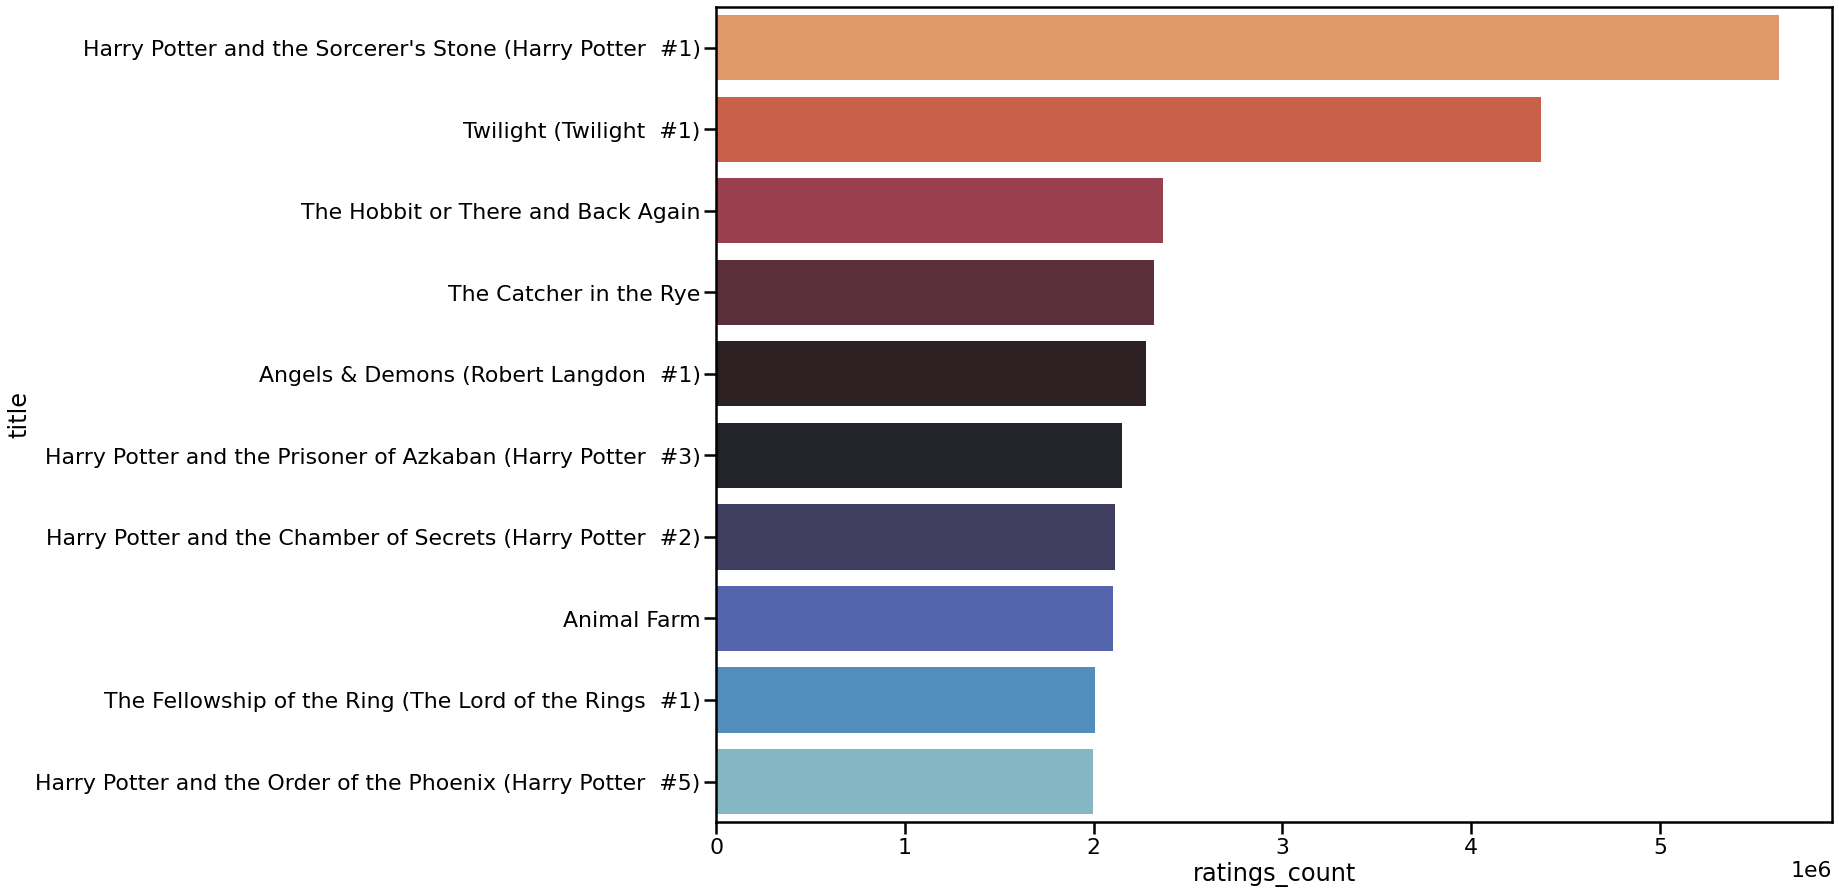

In [31]:
#Plotting highest rated books
plt.figure(figsize=(20,15))
rated = books.sort_values('ratings_count',ascending=False).head(10).set_index('title')
sns.barplot(x=rated['ratings_count'],y=rated.index,palette="icefire_r" )
plt.show()

In [32]:
books.info() # NO null objectes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13714 entries, 1 to 47709
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              13714 non-null  int64  
 1   title               13714 non-null  object 
 2   authors             13714 non-null  object 
 3   average_rating      13714 non-null  float64
 4   isbn                13714 non-null  object 
 5   isbn13              13714 non-null  int64  
 6   language_code       13714 non-null  object 
 7   # num_pages         13714 non-null  int64  
 8   ratings_count       13714 non-null  int64  
 9   text_reviews_count  13714 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.2+ MB


<AxesSubplot:xlabel='average_rating', ylabel='Count'>

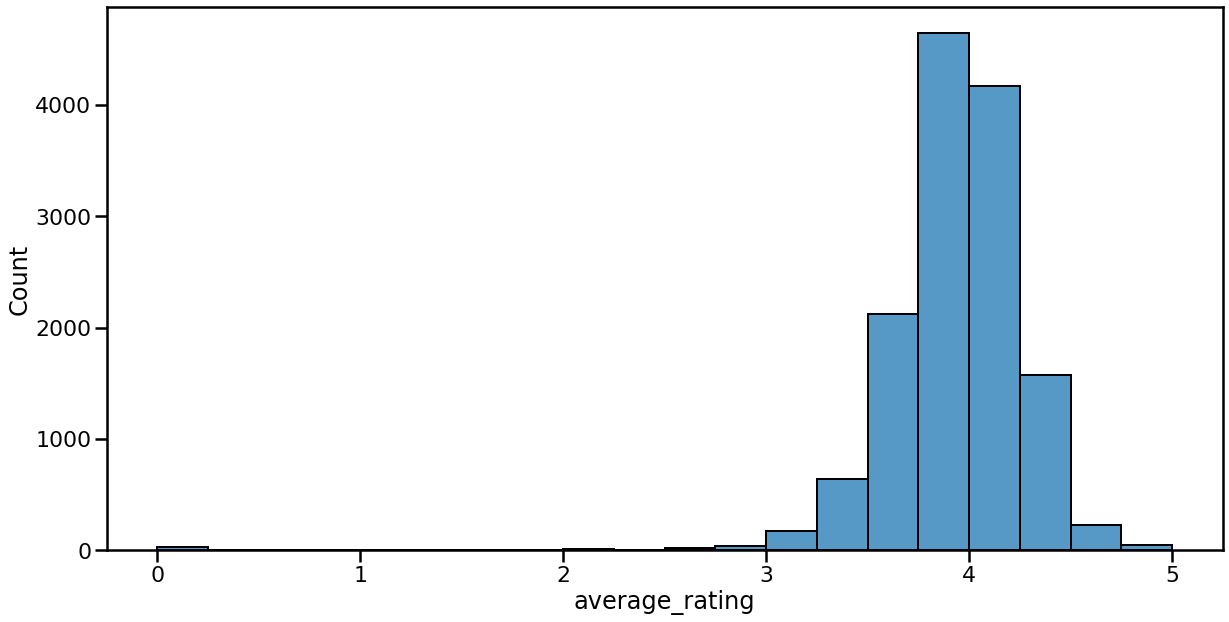

In [33]:
# visulaizing ratings
plt.figure(figsize=(20,10))
rating = books["average_rating"].astype(float)
sns.histplot(rating,bins=20)

In [34]:
trial = books[['average_rating','ratings_count']]
data = np.asarray([np.asarray(trial["average_rating"]),np.asarray(trial['ratings_count'])]).T

Text(0.5, 1.0, 'Elbow Curve')

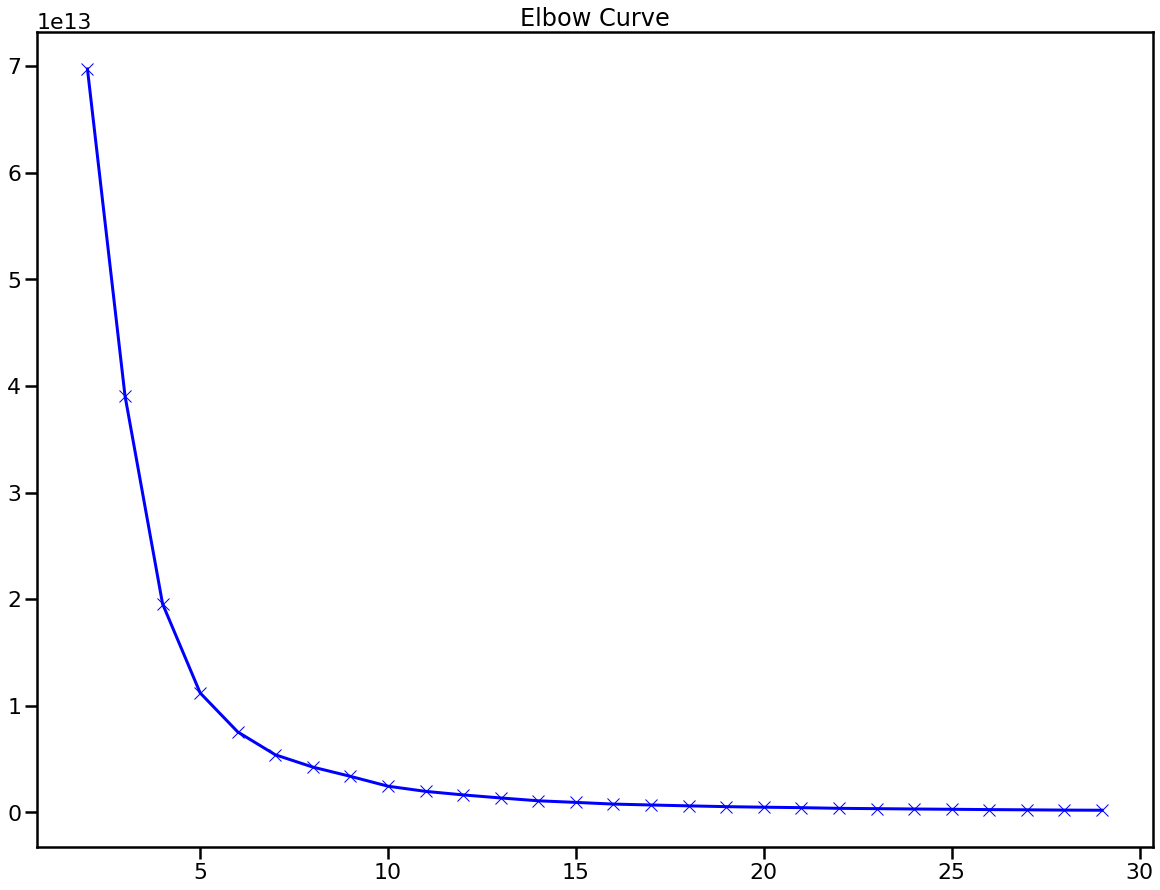

In [35]:
X = data
dis = []
from sklearn.cluster import KMeans
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    dis.append(k_means.inertia_)
plt.figure(figsize=(20,15))
plt.plot(range(2,30),dis,'bx-')
plt.title('Elbow Curve')

In [36]:
# Elbow at k = 5
from scipy.cluster.vq import vq,kmeans

centroids, _ = kmeans(data,5)
idx, _ = vq(data,centroids)

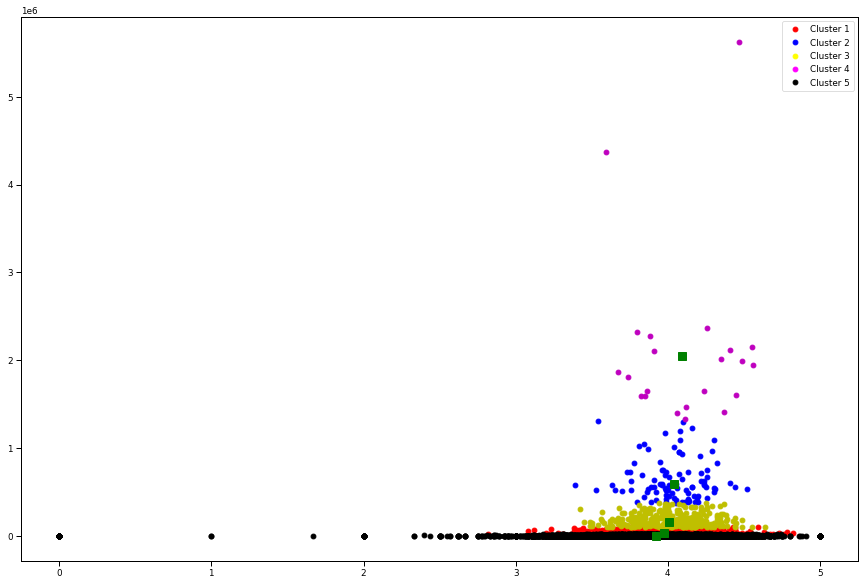

In [37]:
from matplotlib.lines import Line2D
sns.set_context('paper')
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'or',#red circles
     data[idx==1,0],data[idx==1,1],'ob',#blue circles
     data[idx==2,0],data[idx==2,1],'oy', #yellow circles
     data[idx==3,0],data[idx==3,1],'om', #magenta circles
     data[idx==4,0],data[idx==4,1],'ok',#black circles
    
     
        
        
        
        
        )
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8, )




circle1 = Line2D(range(1), range(1), color = 'red', linewidth = 0, marker= 'o', markerfacecolor='red')
circle2 = Line2D(range(1), range(1), color = 'blue', linewidth = 0,marker= 'o', markerfacecolor='blue')
circle3 = Line2D(range(1), range(1), color = 'yellow',linewidth=0,  marker= 'o', markerfacecolor='yellow')
circle4 = Line2D(range(1), range(1), color = 'magenta', linewidth=0,marker= 'o', markerfacecolor='magenta')
circle5 = Line2D(range(1), range(1), color = 'black', linewidth = 0,marker= 'o', markerfacecolor='black')

plt.legend((circle1, circle2, circle3, circle4, circle5)
           , ('Cluster 1','Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'), numpoints = 1, loc = 0, )


plt.show()


In [38]:
# removing outliers
trial.idxmax()

average_rating    2034
ratings_count        3
dtype: int64

In [39]:
trial.drop(3,inplace=True)
trial.drop(41865,inplace=True)

/home/krish/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
def dist(books):
    values = []
    for val in books["average_rating"]:
        if val>=0 and val<=1:
            values.append("Between 0 and 1")
        elif val>1 and val<=2:
            values.append("Between 1 and 2")
        elif val>2 and val<=3:
            values.append("Between 2 and 3")
        elif val>3 and val<=4:
            values.append("Between 3 and 4")
        elif val>4 and val<=5:
            values.append("Between 4 and 5")
        else:
            values.append("NaN")
    return values

In [41]:
books['Ratings_Dist'] = dist(books)

In [42]:
books_features = pd.concat([books['Ratings_Dist'].str.get_dummies(sep=","),
                           books["average_rating"],books["ratings_count"]],axis=1)


In [43]:
books_features.head()

,Between 0 and 1,Between 1 and 2,Between 2 and 3,Between 3 and 4,Between 4 and 5,average_rating,ratings_count
bookID,,,,,,,
1,0,0,0,0,1,4.56,1944099
2,0,0,0,0,1,4.49,1996446
3,0,0,0,0,1,4.47,5629932
4,0,0,0,0,1,4.41,6267
5,0,0,0,0,1,4.55,2149872


In [44]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
books_features = min_max_scaler.fit_transform(books_features)

In [45]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors = 6,algorithm='brute')
model.fit(books_features)
distance,indices = model.kneighbors(books_features)

In [49]:
def get_index_from_title(title):
    return books[books["title"]==title].index.tolist()[0]
def get_index_from_author(author):
    return books[books["authors"]==author].index.tolist()[0]

def similar_books(title=None,author=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(books.iloc[id]["title"])
    if title:
        found_title = get_index_from_title(title)
        for id in indices[found_title][1:]:
            print(books.iloc[id]["title"])
    if author:
        found_author = get_index_from_author(author)
        for id in indices[found_author][1:]:
            print(books.iloc[id]["title"])

In [51]:
similar_books(author="J.K. Rowling")

Harry Potter and the Half-Blood Prince (Harry Potter  #6)
Harry Potter and the Chamber of Secrets (Harry Potter  #2)
The Fellowship of the Ring (The Lord of the Rings  #1)
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)
A Game of Thrones (A Song of Ice and Fire  #1)


In [52]:
similar_books("To Kill a Mockingbird")

The Glass Lake
Faking It (Dempseys  #2)
Lady Friday (The Keys to the Kingdom  #5)
Tar Baby
Inés of My Soul


In [ ]:
# Saved model
import pickle
from joblib import dump
dump(model, 'model.pkl')